DSE 6000 Project 1
Hannah McQuade
gk6387

Initial question: Does the type of building permit issued increase or decrease the crime in the area?

This was the question I went into these datasets with, but I did not end up answering it. I found other questions about the data that I explored. Now that I am more comfortable with python and visualization tools, I will want to visit this quesiton again when I have more time to dedicate to it.

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

det_crime = pd.read_csv("datasets/DPD__Reported_Major_Crimes__2011-2014.csv")
det_build_permits = pd.read_csv('datasets/Building_Permits.csv', parse_dates=[1])

print(det_crime.info())
print(det_crime.describe())
print(det_build_permits.info())
print(det_build_permits.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234978 entries, 0 to 234977
Data columns (total 11 columns):
ROWNUM                   234978 non-null int64
CATEGORY                 234978 non-null object
OFFENSEDESCRIPTION       234978 non-null object
STATEOFFENSEFILECLASS    234978 non-null int64
INCIDENTDATE             234978 non-null object
HOUR                     234978 non-null int64
SCA                      233849 non-null float64
PRECINCT                 233849 non-null float64
NEIGHBORHOOD             233402 non-null object
CENSUSTRACT              217425 non-null float64
LOCATION                 234978 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 19.7+ MB
None
             ROWNUM  STATEOFFENSEFILECLASS           HOUR            SCA  \
count  2.349780e+05          234978.000000  234978.000000  233849.000000   
mean   1.603119e+06           20353.919056      12.902140     750.331436   
std    1.674553e+05            4666.118002       6.878887     741

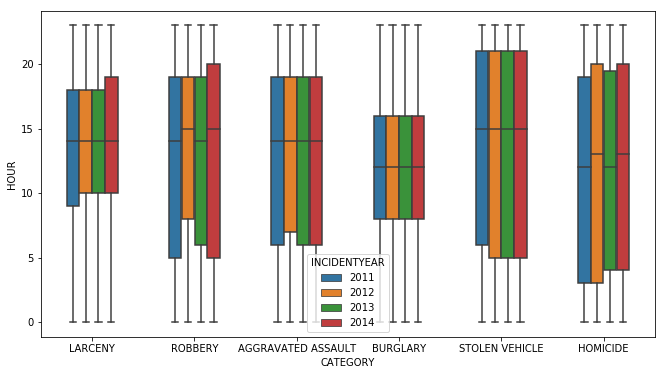

In [3]:
crime_HR = det_crime['HOUR']
crime_cat = det_crime['CATEGORY']
det_crime['INCIDENTYEAR'] = pd.to_datetime(det_crime['INCIDENTDATE']).dt.year
fig=plt.figure(1,figsize=(11,6)) #set size of figure to be created
sns.boxplot(x="CATEGORY", y = "HOUR", hue = "INCIDENTYEAR", data=det_crime, width=0.5)

At first I made a box plot per category, which showed burglary had lower median time of happening during the day than any other category. Then I split it by year to see if there was a year trend, but burlary did not change quartiles at all. I look into that more below.

This plot also shows that all crimes happen at all times of the day. I found it interesting that 50% of the homicides and stolen vehicles happen between the hours of 8 pm and 4am. The other categories have more condensed spreads around the middle of the day.

,CATEGORY,INCIDENTYEAR,ROWNUM,STATEOFFENSEFILECLASS,HOUR,SCA,PRECINCT,CENSUSTRACT
0,AGGRAVATED ASSAULT,2011,1.390344e+06,13002.000000,12.558451,761.593360,7.549026,4.176457e+05
1,AGGRAVATED ASSAULT,2012,1.543520e+06,13002.000000,12.990228,772.272131,7.655738,6.820529e+06
2,AGGRAVATED ASSAULT,2013,1.694950e+06,13002.000000,12.721839,784.143586,7.772598,1.587641e+06
3,AGGRAVATED ASSAULT,2014,1.833166e+06,13002.000000,12.723970,766.096379,7.594644,7.722829e+06
4,BURGLARY,2011,1.397614e+06,22001.081733,12.176947,759.611449,7.529847,3.303109e+05
5,BURGLARY,2012,1.548059e+06,22001.091573,12.128478,754.585488,7.480673,6.435553e+06
6,BURGLARY,2013,1.695530e+06,22001.085712,12.268940,759.077030,7.525303,1.982318e+06
7,BURGLARY,2014,1.833597e+06,22001.102843,12.245538,749.648483,7.432353,8.765903e+06
8,HOMICIDE,2011,1.395859e+06,9001.000000,11.772334,717.346821,7.115607,2.060636e+05
9,HOMICIDE,2012,1.551843e+06,9001.000000,11.887755,748.071429,7.418367,8.694270e+06


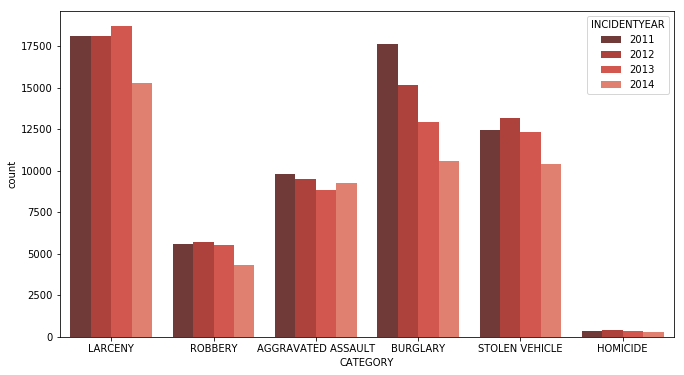

In [4]:
fig=plt.figure(1,figsize=(11,6)) #set size of figure to be created
sns.countplot(x="CATEGORY", hue="INCIDENTYEAR",data = det_crime, palette="Reds_d")
crime_counts=det_crime.groupby(['CATEGORY', 'INCIDENTYEAR'], as_index=False).count()
crime_means=det_crime.groupby(['CATEGORY', 'INCIDENTYEAR'], as_index=False).mean()
crime_means.head(10)

I was surprised by the vast difference in count of homicides compared to the other crime categories. I attribute this to hearing on the news about homicides as often or more than aggrevated assult for instance. That bias made me think that , in the category of homicide at least, Detroit was worse off than it actually is.

You can also see from this graph how the number of incidents is decreasing over the years. This is a very good sign.

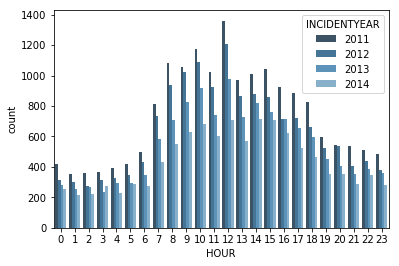

In [5]:
crime_Burglary = det_crime[crime_cat =='BURGLARY']
sns.countplot(x="HOUR", hue="INCIDENTYEAR", data = crime_Burglary, palette="Blues_d")


Since burglaries was the only crime category which median and other quartiles did not change over the years, I wanted to look into it more in-depth. This graph shows that the total crimes have been decreasing the same amount over all of the hours of the day, not just in one area, which is why the quartile values did not change.

In [6]:
det_build_permits['ISSUED_YEAR'] = pd.to_datetime(det_build_permits['PERMIT_ISSUED']).dt.year
det_build_permits['ISSUED_MONTH'] = pd.to_datetime(det_build_permits['PERMIT_ISSUED']).dt.month
build_type_top = det_build_permits.groupby(['BLD_TYPE_USE'],as_index=False).count().sort_values(['PERMIT_NO'], ascending=False);
build_type_top_list=build_type_top.iloc[0:3,0]

In [7]:

build_type_flt = det_build_permits.loc[det_build_permits['BLD_TYPE_USE'].isin(build_type_top_list)]
build_type_grp = build_type_flt.groupby(['BLD_TYPE_USE', 'ISSUED_YEAR'],as_index=False).count().sort_values(['ISSUED_YEAR'], ascending=False);


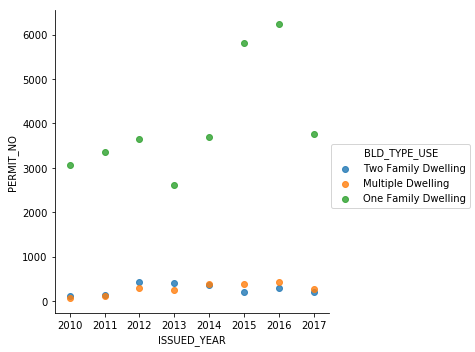

In [8]:
sns.lmplot(x='ISSUED_YEAR', y='PERMIT_NO', hue='BLD_TYPE_USE', fit_reg=False, data=build_type_grp)

One family dwellings account for the largest number of building permits issued over the past 7 years. The good news is that the count is increasing. 2017 is not complete yet, so I would want to run this same analysis with complete 2017 data. I would also want to see where the building permits are from year to year, and if any particular area is on the raise in popularity. If I were an investor, I might want to look at buying property in that area.

In [9]:
#Splitting the Location columns for both data sets into Latitude and Longitude

det_crime_location=pd.DataFrame(det_crime['LOCATION'].str.split('(', expand=True))
det_crime_location2=pd.DataFrame(det_crime_location[1].str.split(')', expand=True))
det_crime_location3=pd.DataFrame(det_crime_location2[0].str.split(',', expand=True))
det_crime_location3.columns=[ 'Latitude','Longitude']
det_crime_location3['Longitude']=pd.to_numeric(det_crime_location3['Longitude'], errors='coerce')
det_crime_location3['Latitude']=pd.to_numeric(det_crime_location3['Latitude'], errors='coerce')

#Then adding just those columns back to the data set
det_crime_location3=det_crime_location3.set_index(det_crime.index)
det_crime_location3=det_crime_location3.fillna(0)
det_crime['Latitude']= det_crime_location3.iloc[:,0].values
det_crime['Longitude']= det_crime_location3.iloc[:,1].values

bp_loc=pd.DataFrame(det_build_permits['owner_location'].str.split('(', expand=True))
bp_loc2=pd.DataFrame(bp_loc[1].str.split(')', expand=True))
bp_loc3=pd.DataFrame(bp_loc2[0].str.split(',', expand=True))
bp_loc3.columns=['Latitude','Longitude']
bp_loc3['Longitude']=pd.to_numeric(bp_loc3['Longitude'], errors='coerce')
bp_loc3['Latitude']=pd.to_numeric(bp_loc3['Latitude'], errors='coerce')

bp_loc3=bp_loc3.set_index(det_build_permits.index)
bp_loc3=bp_loc3.fillna(0)
det_build_permits['Latitude']= bp_loc3.iloc[:,0].values
det_build_permits['Longitude']= bp_loc3.iloc[:,1].values

print('Changing this format:')
print(det_build_permits['owner_location'].head(5))
print('To this:')
print(bp_loc3.head(5))

Changing this format:
0    20040 ST AUBIN ST\nDETROIT, MI 48234-1252\n(42...
1    17596 WARRINGTON\nDETROIT, MI\n(42.422342, -83...
2                 DETROIT, MI\n(42.332916, -83.047853)
3    19338 DEAN ST\nDETROIT, MI 48234-2004\n(42.436...
4    6821 GRANDMONT\nDETROIT, MI\n(42.341621, -83.2...
Name: owner_location, dtype: object
To this:
    Latitude  Longitude
0  42.442205 -83.081986
1  42.422342 -83.139644
2  42.332916 -83.047853
3  42.436331 -83.062262
4  42.341621 -83.208501


I could definitely do this block more efficiently, but this was how I got it working. I was having trouble working with the location columns in the entire dataset, so I made a copy of just that column to work with. Then adding it back in with numeric and string values (since not all rows had coordinates) was problematic. Cleaning the data is extremely important and as I found out here, more difficult than it may seem.

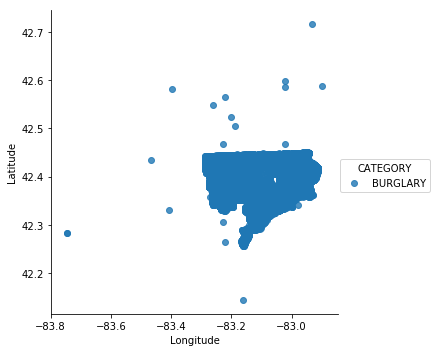

In [10]:
category='BURGLARY'
#category='HOMICIDE'
#Filter out the 0s in Lat/Long

det_crime_coord_flt=det_crime.loc[(det_crime['Latitude']>42) &(det_crime['Longitude']<-80)&(det_crime['Longitude']>-84)]
det_crime_coord_cat=det_crime_coord_flt.loc[(det_crime_coord_flt['CATEGORY']==category)]
sns.lmplot(x='Longitude', y='Latitude', hue='CATEGORY', data=det_crime_coord_cat, fit_reg=False)

Homicide is the easiest scatter plot to view beause it has the least number of incidents. When I graphed the other categories, however, there seemed to be a clear line at about 42.45 Latitude. Since it's hoizontal, I figure this might be a road. 8 mile is at 42.448 lat, which is a good candidate. 9 mile is at 42.463 lat. My further investigation question is why is there this line in the data? Does crime really decrease that much north of 9 mile? Or were the reports based on where they were filed? Most being filed took place within the juristiction of Detroit, but possibly others that were filed took place in the suburbs.



In [11]:
import pygal
from pygal.style import LightStyle

In [12]:
crime_cnts=det_crime.groupby(['CATEGORY'], as_index=False).count().sort_values('ROWNUM', ascending=False)

bar_chart_human=pygal.Bar(style=LightStyle, width=1000, height=700,
                   legend_at_bottom=True, human_readable=True,
                   title='Crime count by category (Human Readable=True)')
bar_chart_nonhuman=pygal.Bar(style=LightStyle, width=1000, height=700,
                   legend_at_bottom=True, human_readable=False,
                   title='Crime count by category (Human Readable=False)')
for index,row in crime_cnts.iterrows():
    bar_chart_human.add(row["CATEGORY"], row["ROWNUM"])
    bar_chart_nonhuman.add(row["CATEGORY"], row["ROWNUM"])
 
bar_chart_human.render_to_file('datasets/crime_human.svg')
bar_chart_nonhuman.render_to_file('datasets/crime_non.svg')

Setting the style and legends up before hand then calling that layout seems to be a theme in the other visualization packages. Good for repeating charts with same formats. I didn't find pygal extrememly useful over seaborn, but it was easier to figure out how to make the figure larger (width and height dimensions).

Conclusion: The number of incidents of crime (tracked in this data set) is decreasing from 2011-2014, with homicides being the lowest count out of all the other categories. The time of day the crimes take place spread out throughout the day, but 50% of burglaries seem to take place between the hours of 9am-5pm. Plotting the crime incidents by cateogy by location reveals that there is a cut off at a certain latitude (probably an east to west road). I'm pretty sure this just means that north of it is not Detroit's juristiction and the other outliers are reported due to special circumstances. I would want to investigate this further. People are getting more and more building permits overall from 2011-2014, especially one family dwellings. This is a good sign, most likely indicating that people are trying to build and move back into Detroit.

Additional questions: 1) did the other crimes result in some kind of killing? 2) What is the definition of "homicide" vs manslaughter? Is that distinction caught in the data? 3) what is the percentage of building permits to what is actually built? Is that 100%? 4) Looking at building permits vs crime rate months or years later in that same area. 5) See if the number of crime incidents still falling from 2015-2017. 6) Does mugging count as robbery?